In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 1. Read the dataset

In [33]:
data = pd.read_csv("bank.csv")
print(data.head(25))
print()
print(data.describe())


    RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           1    15634602   Hargrave          619    France  Female   42   
1           2    15647311       Hill          608     Spain  Female   41   
2           3    15619304       Onio          502    France  Female   42   
3           4    15701354       Boni          699    France  Female   39   
4           5    15737888   Mitchell          850     Spain  Female   43   
5           6    15574012        Chu          645     Spain    Male   44   
6           7    15592531   Bartlett          822    France    Male   50   
7           8    15656148     Obinna          376   Germany  Female   29   
8           9    15792365         He          501    France    Male   44   
9          10    15592389         H?          684    France    Male   27   
10         11    15767821     Bearce          528    France    Male   31   
11         12    15737173    Andrews          497     Spain    Male   24   
12         1

In [34]:
data.head(25)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [35]:
df = pd.get_dummies(data, columns=['Geography','Gender'])
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# 2. Drop the columns which are unique for all users like IDs

In [36]:
df=df.iloc[:,3:]
df.head(25)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [37]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


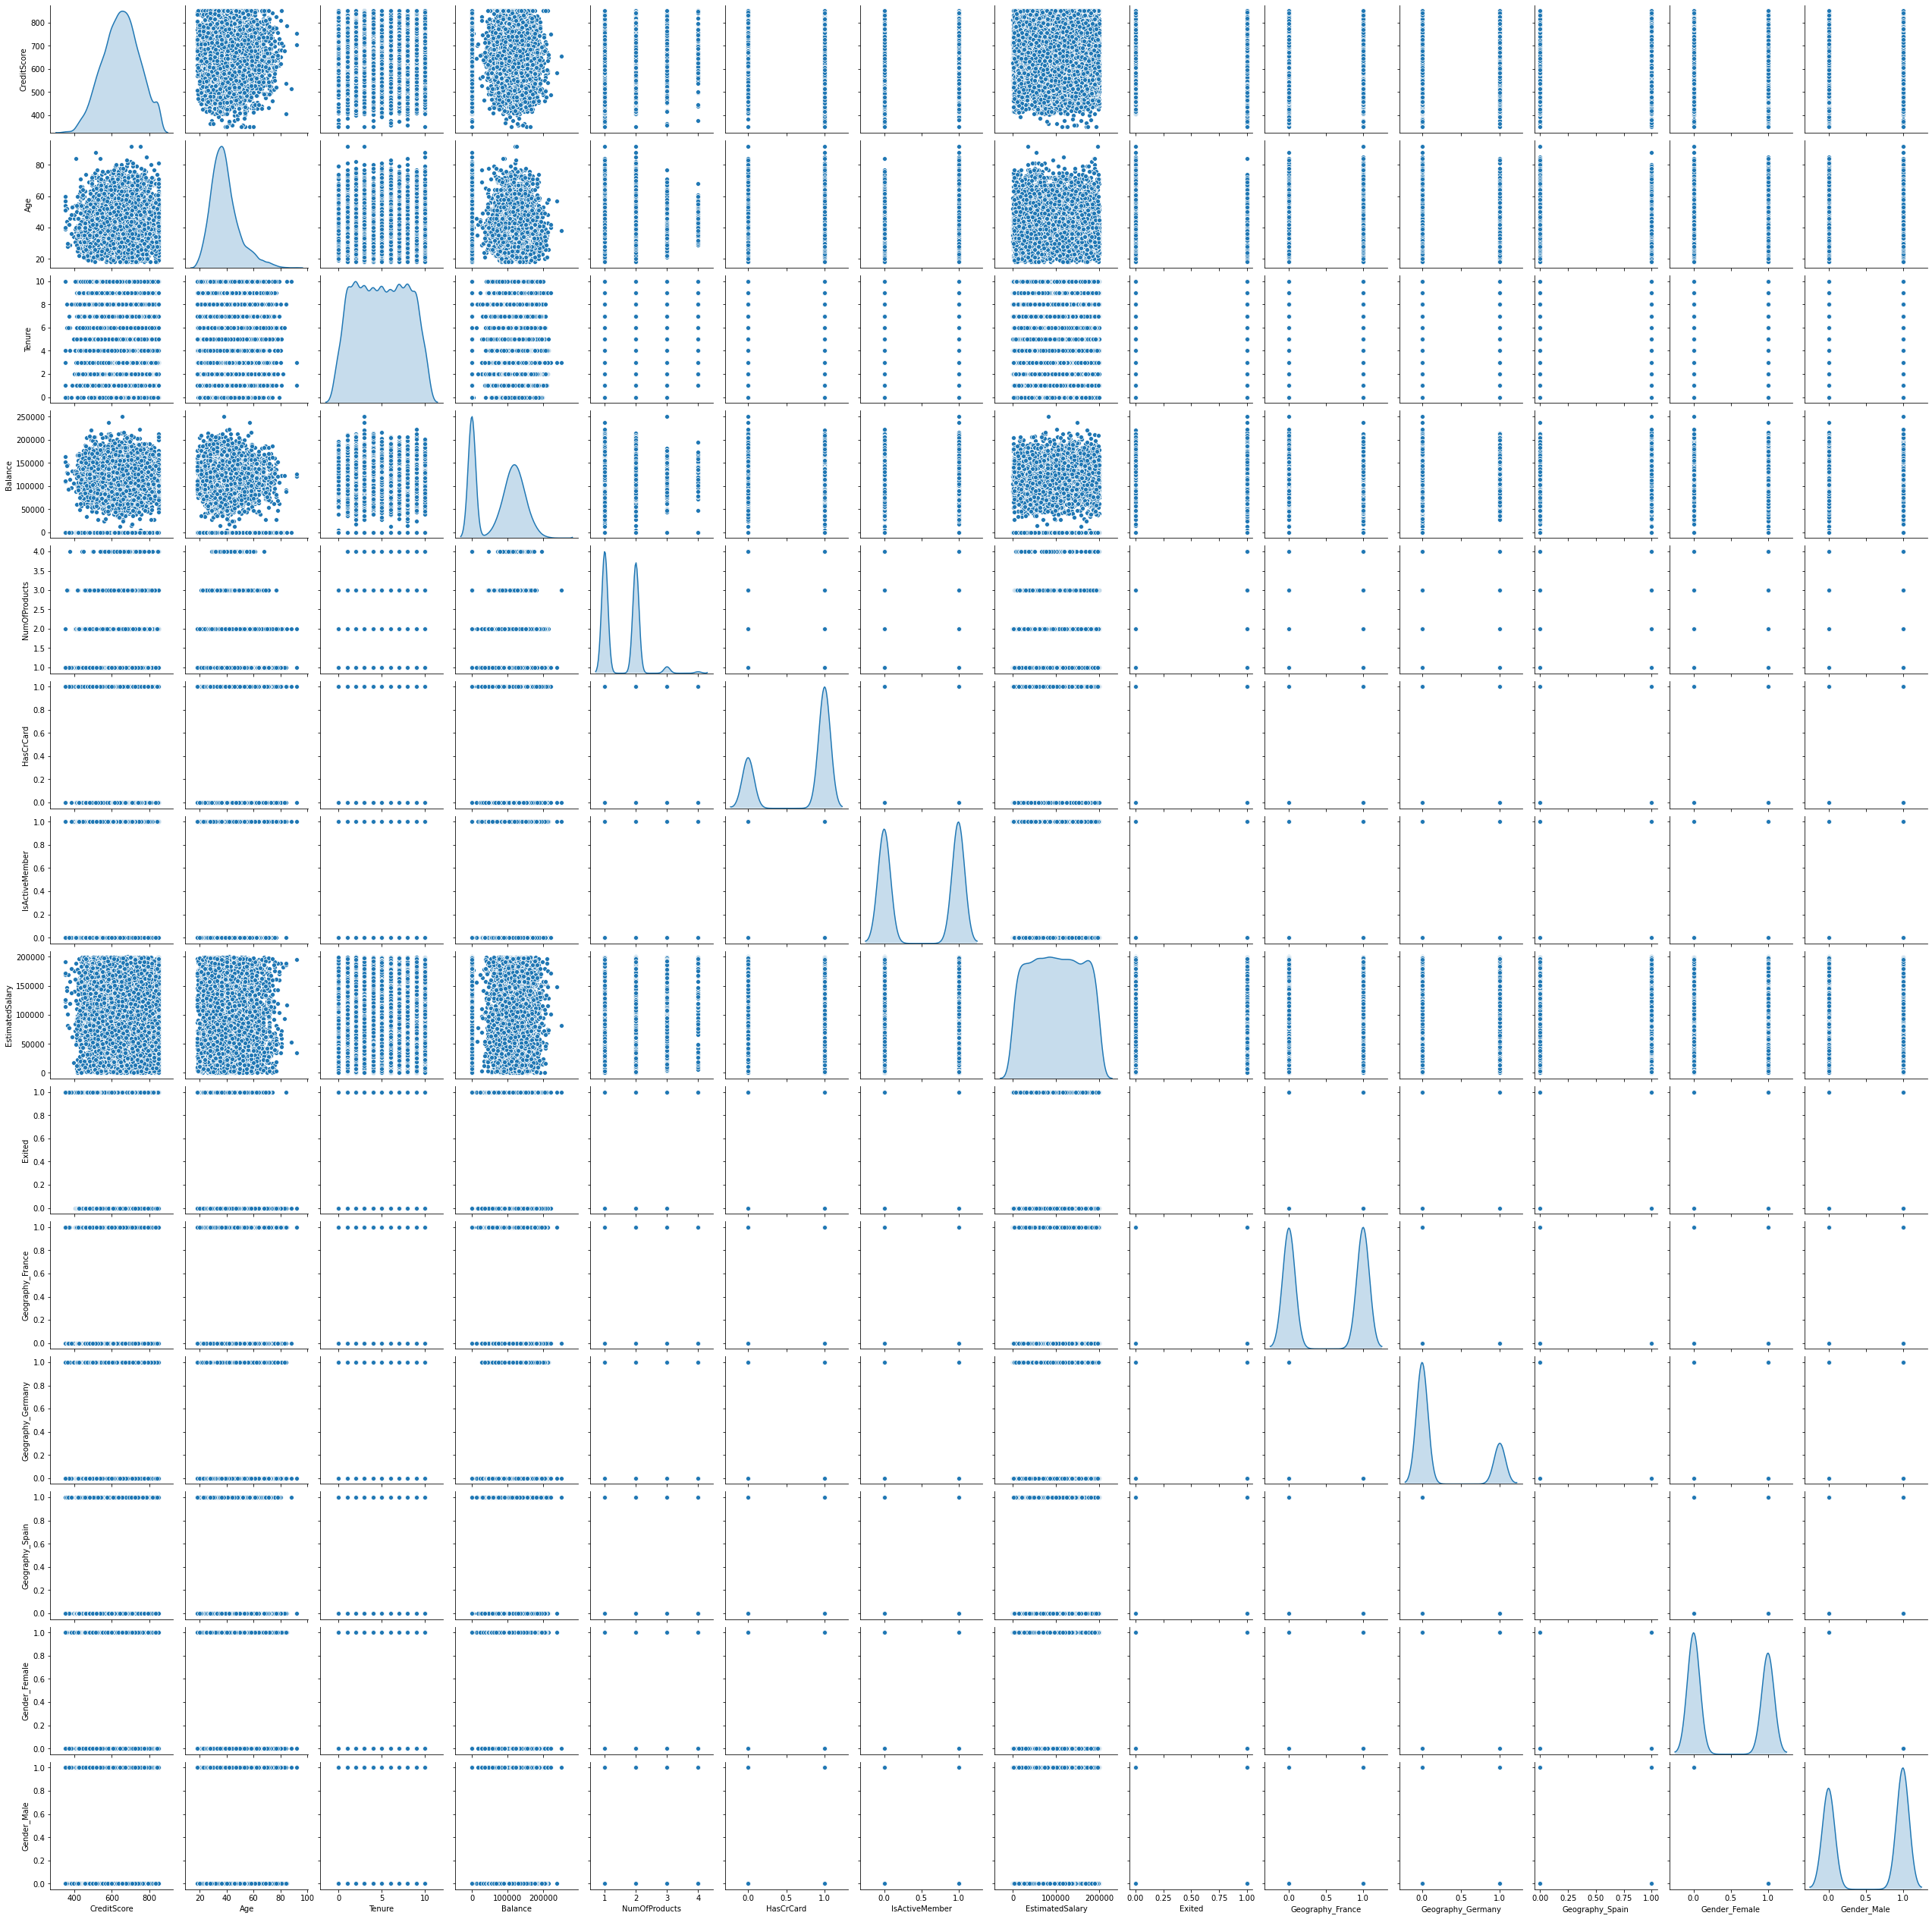

In [39]:

import seaborn as sns
sns.pairplot(df, diag_kind='kde');

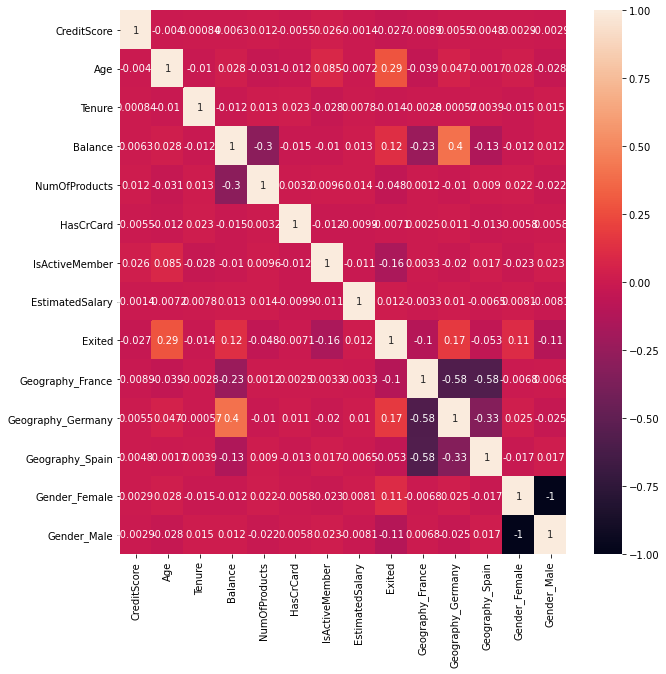

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# 3. Perform bivariate analysis and give your insights from the same

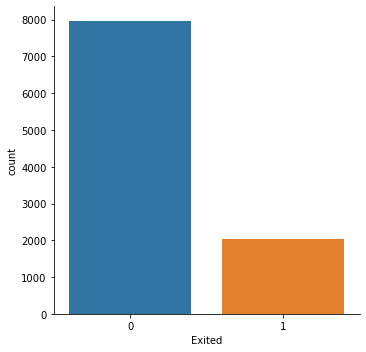

In [11]:
sns.catplot(x="Exited", kind="count", data=data)

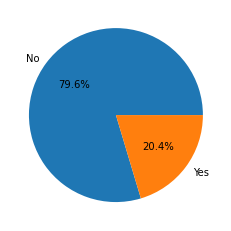

In [12]:
Pie = data['Exited'].value_counts(sort = True)
plt.pie(Pie,labels=['No','Yes'],autopct='%1.1f%%')
plt.show()

### We can see that 20.4% of the 10000 customers left the Bank 

C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


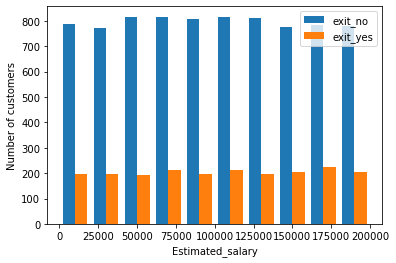

In [13]:


Salary_no=df[df['Exited']==0].EstimatedSalary
Salary_yes=df[df['Exited']==1].EstimatedSalary

plt.xlabel("Estimated_salary")
plt.ylabel("Number of customers")

plt.hist([Salary_no,Salary_yes],label=['exit_no','exit_yes'])
plt.legend()

### Salary does not appear to be a strong metric to predict churn of customers, as the amount of customers that left the bank is relatively consistent among most range of salaries 

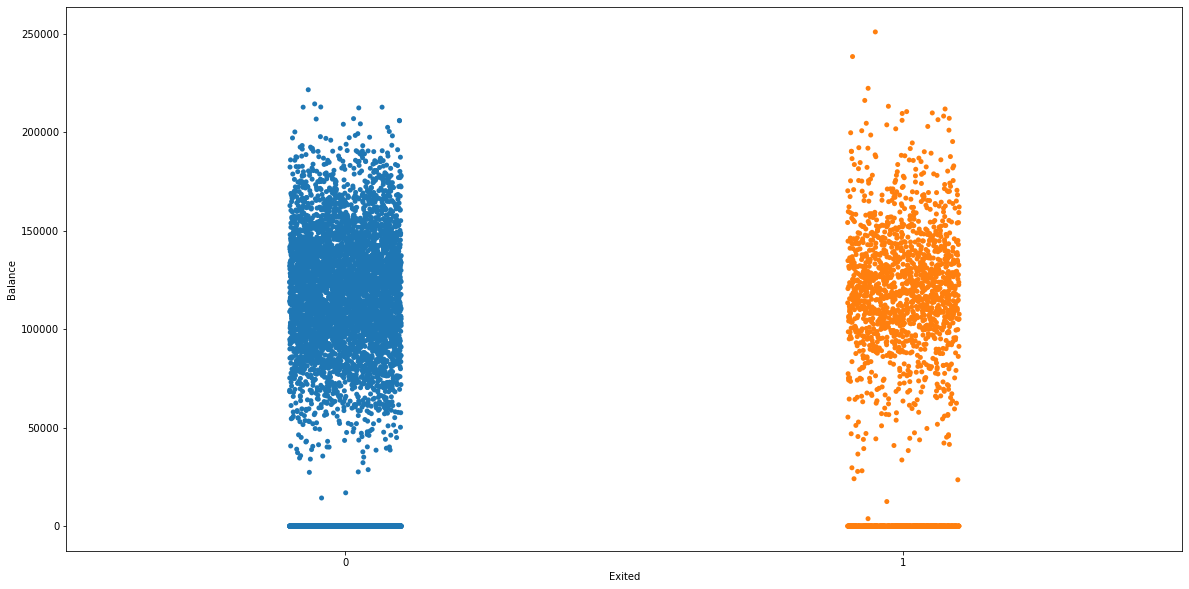

In [14]:
plt.figure(figsize=(20,10))
sns.stripplot(x='Exited', y='Balance',data=data)


### Data set may be bias, as it seems to inclued few customerts with balances between 0 and $50000. 

<BarContainer object of 2 artists>

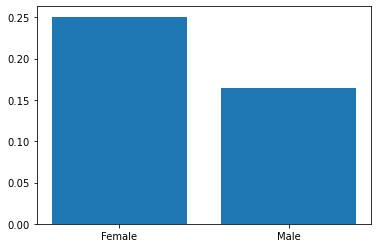

In [66]:
gender=data.groupby('Gender').Exited.mean().reset_index()
plt.bar(gender['Gender'],gender['Exited'])


### By taking the mean of the Exited data and grouping with Gender, we can see that females have a higher churn rate compared to males

# 4. Distinguish the feature and target set and divide the data set into training and test sets

In [67]:

from sklearn.model_selection import train_test_split

X=df.drop('Exited',axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

# 5. Normalize the train and test data

In [68]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# 6. Initialize & build the model. Identify the points of improvement and implement the same.

In [84]:
 #Initialize & build the model. Identify the points of improvement and implement the same. 
model1 = Sequential()
model1.add(Dense(10,activation='relu'))
model1.add(Dense(10, activation ='relu'))
model1.add(Dense(1,activation='sigmoid'))
    

In [85]:
import tensorflow as tf
optimizer = tf.keras.optimizers.RMSprop(0.001)


model1.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse','accuracy'])
                   

epochs = 50

In [86]:
history = model1.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

        loss       mae       mse  accuracy  val_loss   val_mae   val_mse  \
0   0.180295  0.373877  0.180295  0.745179  0.158853  0.313112  0.158853   
1   0.151290  0.302956  0.151290  0.800179  0.150146  0.294639  0.150146   
2   0.145000  0.290504  0.145000  0.803214  0.145158  0.290431  0.145158   
3   0.140472  0.282960  0.140472  0.806071  0.141313  0.282840  0.141313   
4   0.136467  0.276717  0.136467  0.811786  0.137977  0.269817  0.137977   
5   0.133122  0.267264  0.133122  0.818393  0.135177  0.264768  0.135177   
6   0.130113  0.260859  0.130113  0.827143  0.132185  0.263972  0.132185   
7   0.127139  0.254374  0.127139  0.831250  0.129363  0.261905  0.129363   
8   0.124404  0.252960  0.124404  0.837857  0.126684  0.251729  0.126684   
9   0.121486  0.246771  0.121486  0.843393  0.124283  0.246102  0.124283   
10  0.118613  0.241064  0.118613  0.844464  0.120870  0.245588  0.120870   
11  0.115722  0.238098  0.115722  0.848929  0.118491  0.238523  0.118491   
12  0.113151

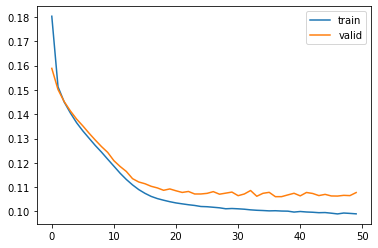

In [87]:
#modle Learning rate=0.001 & epochs=50 optomizer=RMSprop
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)


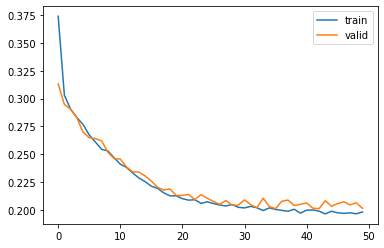

In [88]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)

### Model1 seems to be overfit as it performs better on trianing data than test, this could be a reslut of a large number of epochs. The ridges in valley of the graph above leave us to belive the learning rate and optomize should be adjusted, as the model is unstable.

In [89]:
#model with adam Optomizer and learning rate = 0.001 epochs=30
model2 = Sequential()
model2.add(Dense(10,activation='relu'))
model2.add(Dense(5, activation ='relu'))
model2.add(Dense(1,activation='sigmoid'))
    

In [90]:

optimizer = tf.keras.optimizers.Adam(0.001)


model2.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse','accuracy'])
    
epochs = 30

history = model2.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

        loss       mae       mse  accuracy  val_loss   val_mae   val_mse  \
0   0.180913  0.359571  0.180913  0.791964  0.164939  0.319281  0.164939   
1   0.157360  0.303430  0.157360  0.797679  0.153749  0.296751  0.153749   
2   0.148668  0.289423  0.148668  0.797321  0.147463  0.282609  0.147463   
3   0.143025  0.278274  0.143025  0.796607  0.143603  0.279785  0.143603   
4   0.139065  0.275691  0.139065  0.800536  0.141287  0.271986  0.141287   
5   0.136475  0.269476  0.136475  0.803571  0.139270  0.269788  0.139270   
6   0.134277  0.266638  0.134277  0.809643  0.137691  0.264450  0.137691   
7   0.132612  0.262077  0.132612  0.823393  0.135522  0.266996  0.135522   
8   0.131167  0.260458  0.131167  0.827500  0.134237  0.262801  0.134237   
9   0.129354  0.259156  0.129354  0.830000  0.132570  0.258174  0.132570   
10  0.127627  0.254964  0.127627  0.829464  0.130736  0.256432  0.130736   
11  0.126040  0.251209  0.126040  0.830536  0.129347  0.254000  0.129347   
12  0.124386

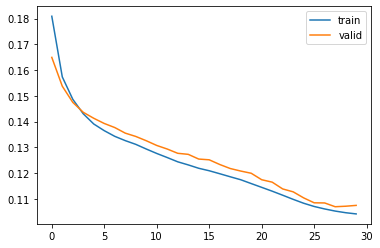

In [91]:
#model with adam Optomizer and learning rate = 0.001 epochs=50
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)


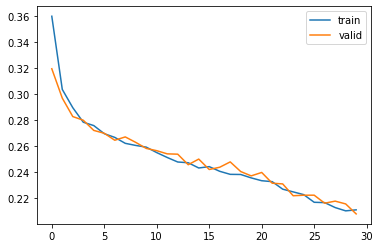

In [92]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)


### Model2 seems to be less overfit but is more unstable; accuracy is slightly worst than model1

# Predict the results using 0.5 as a threshold 

In [93]:

model3 = Sequential()
model3.add(Dense(10,activation='relu'))
model3.add(Dense(5, activation ='relu'))
model3.add(Dense(1,activation='sigmoid'))

opt = tf.optimizers.Adam(learning_rate=0.5)
model3.compile(loss='mean_squared_error',optimizer=opt,metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=50, batch_size=256, verbose=1) 

Epoch 1/50
28/28 [==============================] - 0s 1ms/step - loss: 0.1863 - accuracy: 0.7815
Epoch 2/50
28/28 [==============================] - 0s 591us/step - loss: 0.1712 - accuracy: 0.7990
Epoch 3/50
28/28 [==============================] - 0s 554us/step - loss: 0.1708 - accuracy: 0.7952
Epoch 4/50
28/28 [==============================] - 0s 517us/step - loss: 0.1595 - accuracy: 0.8045
Epoch 5/50
28/28 [==============================] - 0s 517us/step - loss: 0.1692 - accuracy: 0.7950
Epoch 6/50
28/28 [==============================] - 0s 517us/step - loss: 0.1656 - accuracy: 0.8021
Epoch 7/50
28/28 [==============================] - 0s 536us/step - loss: 0.1638 - accuracy: 0.7979
Epoch 8/50
28/28 [==============================] - 0s 554us/step - loss: 0.1711 - accuracy: 0.7962
Epoch 9/50
28/28 [==============================] - 0s 517us/step - loss: 0.1786 - accuracy: 0.7956
Epoch 10/50
28/28 [==============================] - 0s 480us/step - loss: 0.1713 - accuracy: 0.7954
E

### Model3 performed the worst of all models as the learning rate was too large, making it difficult for the model to find the best weights and bias for the model

In [110]:
y_predicted=model1.predict(X_test)

y_pred=[]
for i in y_predicted:
  if i>= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

# Print the Accuracy score and confusion matrix (5 points)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.79      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



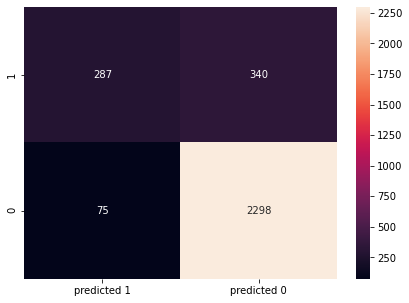

In [115]:
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_test,y_pred, labels=[1,0])
log_cm=pd.DataFrame(cm,index = ["1",'0'],columns=['predicted 1','predicted 0'])
plt.figure(figsize=(7,5))
sns.heatmap(log_cm,annot=True,fmt='g')

Git Hub Link:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle/blob/master/Project-Bank_Churn_Prediction%20-%20Clayton_Bantle.ipynb